In [9]:
# Import Dependencies
import pandas as pd
import csv

import os
import numpy as np

import requests

from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [11]:
merged_df = pd.read_csv('data/NIHmergedwithCOVIDdata.csv', delimiter = ',')
merged_df.head()

,Unnamed: 0,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate
0,0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN,0.0
1,1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN,0.0
2,2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN,0.0
3,3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN,0.0
4,4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN,0.0


In [106]:
season_df = merged_df.groupby(['Year', 'Month']).agg({'PerCapita': ['mean']})
# season_df = season_df.reset_index()
season_df.head()
# df_daily=df.groupby('date').agg(['sum'])



PerCapita
                mean
Year Month          
2017 1      0.057459
     2      0.056659
     3      0.066859
     4      0.066686
     5      0.071557

In [107]:
season_df.columns

MultiIndex([('PerCapita', 'mean')],
           )

In [108]:
for col in season_df:
    print(col)

('PerCapita', 'mean')


In [109]:
season_df.columns = ['PerCapita']
season_df.reset_index(inplace=True)

In [120]:

season_df["Year"].unique().tolist()

[2017, 2018, 2019, 2020]

In [125]:
for y in season_df["Year"].unique().tolist():
    season_df[y] = season_df.loc[ season_df["Year"]== y ,'PerCapita']

In [133]:
plot_df =season_df.copy(deep=True)

In [139]:
plot_df = plot_df.drop(columns=["Year","PerCapita"]).set_index("Month")

In [140]:
plot_df.columns

Index([2017, 2018, 2019, 2020], dtype='object')

In [144]:
final_plot_df = pd.DataFrame({ col: plot_df[col].dropna() for col in plot_df.columns})
final_plot_df.head()

,2017,2018,2019,2020
Month,,,,
1,0.057459,0.057291,0.061366,0.062484
2,0.056659,0.056209,0.055927,0.059198
3,0.066859,0.063961,0.063289,0.067464
4,0.066686,0.064827,0.068030,0.067205
5,0.071557,0.074345,0.073457,0.071232


Text(0.5, 1.0, 'Seasonality of Alcohol Consumption')

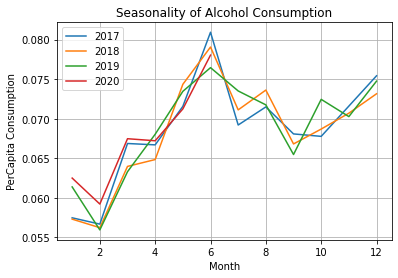

In [148]:
final_plot_df.plot()
plt.xlabel("Month")
plt.grid()
plt.ylabel("PerCapita Consumption")
plt.title("Seasonality of Alcohol Consumption")

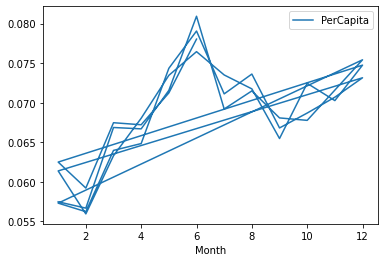

In [115]:
import matplotlib.pyplot as plt
#plt.plot(["PerCapita mean"])
#plt.ylabel('PerCapita')
season_df.plot(x="Month",y="PerCapita")


In [ ]:
y2017 = season_df-seas

In [57]:
season_df_plot.plot(figsize=(10,6), xticks='Month'.legend(title='Year', bbox_to_anchor=(1, 1))

SyntaxError: unexpected EOF while parsing (<ipython-input-57-f3e9536c64f5>, line 1)

ValueError: Unrecognized character e in format string

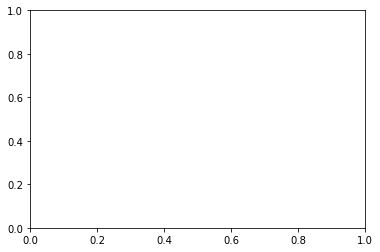

In [54]:
plt.plot('Month', '', kind="line")
plt.show()